# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 boxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

測試切點

In [4]:
test = pd.DataFrame({'CNT_CHILDREN': [0, 1, 2, 3, 4, 5, 6]})                
cut_rule = [-0.5, 0.5, 2.5, 5.5, 10000]
listLabels = ['0','1-2','3-5', 'over 5']
pd.cut(test['CNT_CHILDREN'].values, bins = cut_rule, labels=listLabels, include_lowest=True)

[0, 1-2, 1-2, 3-5, 3-5, 3-5, over 5]
Categories (4, object): [0 < 1-2 < 3-5 < over 5]

In [5]:
#1
"""
Your code here
"""
cut_rule = [-0.5, 0.5, 2.5, 5.5, 10000]
listLabels = ['0','1-2','3-5', 'over 5']

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, bins = cut_rule, labels=listLabels, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

0         215371
1-2        87868
3-5         4230
over 5        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [6]:
#2-1
"""
Your code here
"""
grp = ["TARGET", "CNT_CHILDREN_GROUP"]

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

TARGET  CNT_CHILDREN_GROUP
0       0                     166747.010980
        1-2                   174590.584401
        3-5                   175053.742913
        over 5                139159.090909
1       0                     160804.210548
        1-2                   176115.362720
        3-5                   160677.385714
        over 5                180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

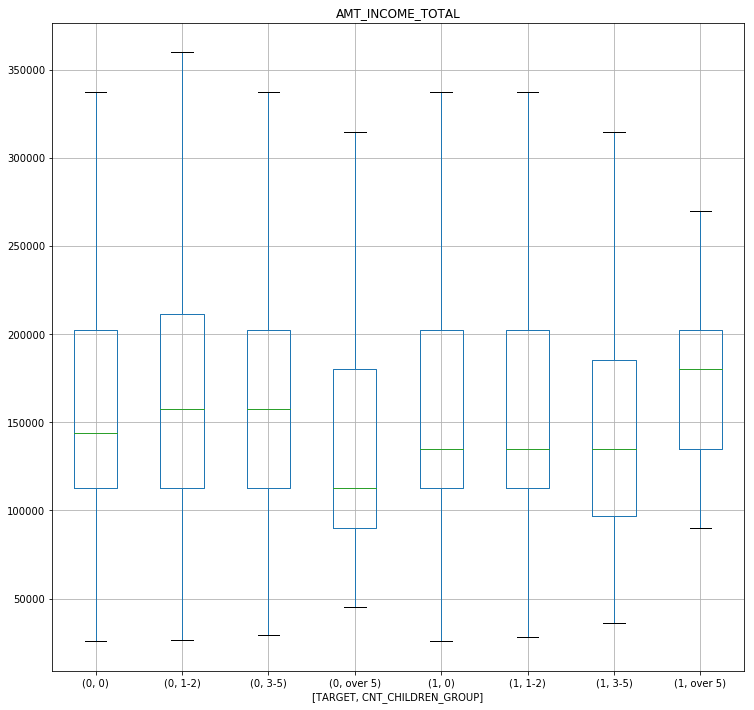

In [7]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ["TARGET", "CNT_CHILDREN_GROUP"]

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [8]:
group_m = grouped_df.mean()
group_sd = grouped_df.std()
print("TARGET = 0 && CNT_CHILDREN_GROUP = 1-2 ---> mean %f" % group_m.xs((0,"1-2")))  #利用 xs 找出符合 index 條件的對應值
print(group_m)
print(group_sd)
sub_train = app_train[["TARGET", "CNT_CHILDREN_GROUP", "AMT_INCOME_TOTAL"]]
print(sub_train.head())

TARGET = 0 && CNT_CHILDREN_GROUP = 1-2 ---> mean 174590.584401
TARGET  CNT_CHILDREN_GROUP
0       0                     166747.010980
        1-2                   174590.584401
        3-5                   175053.742913
        over 5                139159.090909
1       0                     160804.210548
        1-2                   176115.362720
        3-5                   160677.385714
        over 5                180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64
TARGET  CNT_CHILDREN_GROUP
0       0                     1.061799e+05
        1-2                   1.201981e+05
        3-5                   1.128427e+05
        over 5                7.112483e+04
1       0                     8.483011e+04
        1-2                   1.327159e+06
        3-5                   1.130315e+05
        over 5                7.377118e+04
Name: AMT_INCOME_TOTAL, dtype: float64
   TARGET CNT_CHILDREN_GROUP  AMT_INCOME_TOTAL
0       1                  0          202500.0
1       0      

In [9]:
df_group_m = pd.DataFrame(group_m).reset_index().rename(index=str, columns={"AMT_INCOME_TOTAL": "mean_AMT_INCOME_TOTAL"})
df_group_sd = pd.DataFrame(group_sd).reset_index().rename(index=str, columns={"AMT_INCOME_TOTAL": "sd_AMT_INCOME_TOTAL"})
#利用兩個欄位合併平均數和標準差
temp = pd.merge(sub_train, df_group_m, on = ["TARGET", "CNT_CHILDREN_GROUP"])
sub_train2 = pd.merge(temp, df_group_sd, on = ["TARGET", "CNT_CHILDREN_GROUP"])
mask1 = sub_train2["TARGET"] == 1
mask2 = sub_train2["CNT_CHILDREN_GROUP"] == "3-5"
sub_train2[(mask1 & mask2)].head()

,TARGET,CNT_CHILDREN_GROUP,AMT_INCOME_TOTAL,mean_AMT_INCOME_TOTAL,sd_AMT_INCOME_TOTAL
307049,1,3-5,180000.0,160677.385714,113031.45632
307050,1,3-5,157500.0,160677.385714,113031.45632
307051,1,3-5,45000.0,160677.385714,113031.45632
307052,1,3-5,180000.0,160677.385714,113031.45632
307053,1,3-5,135000.0,160677.385714,113031.45632


###  Z-transform: $ \frac{(x - mean(x))}{std(x)} $

In [10]:
#3 直接利用平均數和標準差計算 Z 轉換值
"""
Your code here
"""
sub_train2['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = (sub_train2["AMT_INCOME_TOTAL"] - sub_train2["mean_AMT_INCOME_TOTAL"]) / sub_train2["sd_AMT_INCOME_TOTAL"]
sub_train2[['AMT_INCOME_TOTAL', 'mean_AMT_INCOME_TOTAL', 'sd_AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,mean_AMT_INCOME_TOTAL,sd_AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,160804.210548,84830.105122,0.491521
1,112500.0,160804.210548,84830.105122,-0.569423
2,202500.0,160804.210548,84830.105122,0.491521
3,135000.0,160804.210548,84830.105122,-0.304187
4,81000.0,160804.210548,84830.105122,-0.940753
